**1.MOBILE PRICE CLASSIFICATION**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
mobile= pd.read_csv("/content/Mobiletrain.csv")

In [ ]:
mobile.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [ ]:
mobile.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
X = mobile.drop('ram', axis=1)
y = mobile['ram']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.nunique(), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1562)              101530    
                                                                 
Total params: 107,034
Trainable params: 107,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
50/50 [==============================] - 1s 10ms/step - loss: 7.3931 - accuracy: 0.0000e+00 - val_loss: 7.4410 - val_accuracy: 0.0000e+00
Epoch 2/10
50/50 [==============================] - 0s 6ms/step - loss: 7.0343 - accuracy: 0.0237 - val_loss: 8.0969 - val_accuracy: 0.0000e+00
Epoch 3/10
50/50 [==============================] - 0s 5ms/step - loss: 6.2603 - accuracy: 0.0262 - val_loss: 9.0530 - val_accuracy: 0.0000e+00
Epoch 4/10
50/50 [==============================] - 0s 6ms/step - loss: 5.1107 - accuracy: 0.1050 - val_loss: 10.7691 - val_accuracy: 0.0025
Epoch 5/10
50/50 [==============================] - 0s 5ms/step - loss: 3.7190 - accuracy: 0.3388 - val_loss: 12.6788 - val_accuracy: 0.0025
Epoch 6/10
50/50 [==============================] - 0s 6ms/step - loss: 2.3755 - accuracy: 0.6662 - val_loss: 14.6975 - val_accuracy: 0.0025
Epoch 7/10
50/50 [==============================] - 0s 6ms/step - loss: 1.5040 - accuracy: 0.7638 - val_loss: 16.3794 - val_accuracy: 0.0000

In [ ]:
new_mobile_features = [4, 2000, 1, 2.0, 1, 8, 1, 32, 0.8, 145, 4, 1000, 700, 4096, 5, 3, 12, 1, 1, 1]
new_mobile_features_scaled = scaler.transform([new_mobile_features])

prediction = model.predict(new_mobile_features_scaled)
predicted_ram_category = label_encoder.inverse_transform([np.argmax(prediction)])
print('Predicted RAM Category:', predicted_ram_category)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 304ms/step
Predicted RAM Category: [820]


**2.FASHIONMNIST**


In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import seaborn as sns

In [21]:

(X_train, Y_train),(X_test, Y_test) = keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [22]:
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)

X_train shape: (60000, 28, 28) y_train shape: (1600, 1562)


In [23]:

X_train = X_train / 255.0
X_test =X_test / 255.0


In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


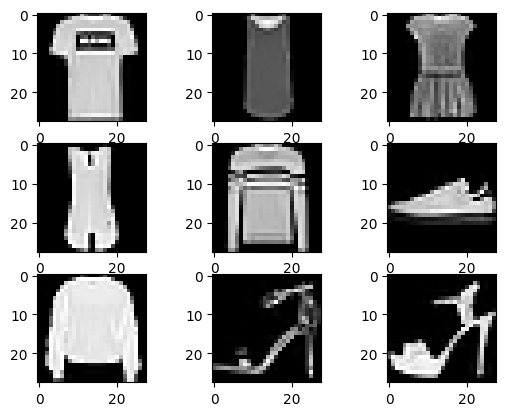

In [27]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

# Display the entire plot
plt.show()

In [ ]:
model.fit(X_train, Y_train, epochs=10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 8s 4ms/step - loss: 0.4969 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3744 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3368 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3130 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2952 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2802 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2707 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2588 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2495 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2403 - accurac

In [28]:
test_loss, test_acc = model.evaluate(X_test,Y_test, verbose=2)
print("Test accuracy:", test_acc)


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 1s - loss: 2.3281 - accuracy: 0.1119 - 611ms/epoch - 2ms/step
Test accuracy: 0.11190000176429749


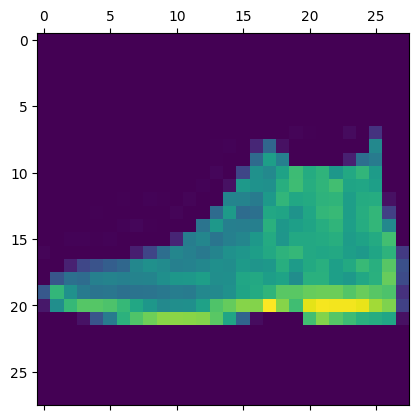

In [29]:
plt.matshow(X_test[0])

In [30]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3281 - accuracy: 0.1119


[2.328098773956299, 0.11190000176429749]

In [31]:
predictions = model.predict(X_test)


313/313 [==============================] - 1s 3ms/step


**3.PENGUINS**

In [38]:
data = pd.read_csv("/content/penguins.csv")

In [39]:
data.head()

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [40]:
data.describe()

rowid  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      342.000000     342.000000         342.000000   
mean   172.500000       43.921930      17.151170         200.915205   
std     99.448479        5.459584       1.974793          14.061714   
min      1.000000       32.100000      13.100000         172.000000   
25%     86.750000       39.225000      15.600000         190.000000   
50%    172.500000       44.450000      17.300000         197.000000   
75%    258.250000       48.500000      18.700000         213.000000   
max    344.000000       59.600000      21.500000         231.000000   

       body_mass_g         year  
count   342.000000   344.000000  
mean   4201.754386  2008.029070  
std     801.954536     0.818356  
min    2700.000000  2007.000000  
25%    3550.000000  2007.000000  
50%    4050.000000  2008.000000  
75%    4750.000000  2009.000000  
max    6300.000000  2009.000000

In [41]:
data.dtypes

rowid                  int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [42]:
data.isnull()

rowid  species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    False    False   False           False          False              False   
1    False    False   False           False          False              False   
2    False    False   False           False          False              False   
3    False    False   False            True           True               True   
4    False    False   False           False          False              False   
..     ...      ...     ...             ...            ...                ...   
339  False    False   False           False          False              False   
340  False    False   False           False          False              False   
341  False    False   False           False          False              False   
342  False    False   False           False          False              False   
343  False    False   False           False          False              False   

     body_mass_g    sex   year  
0          False  False  False  
1          False  False  False  
2          False  False  False  
3           True   True  False  
4          False  False  False  
..           ...    ...    ...  
339        False  False  False  
340        False  False  False  
341        False  False  False  
342        False  False  False  
343        False  False  False  

[344 rows x 9 columns]

In [44]:
data.dropna()

rowid    species     island  bill_length_mm  bill_depth_mm  \
0        1     Adelie  Torgersen            39.1           18.7   
1        2     Adelie  Torgersen            39.5           17.4   
2        3     Adelie  Torgersen            40.3           18.0   
4        5     Adelie  Torgersen            36.7           19.3   
5        6     Adelie  Torgersen            39.3           20.6   
..     ...        ...        ...             ...            ...   
339    340  Chinstrap      Dream            55.8           19.8   
340    341  Chinstrap      Dream            43.5           18.1   
341    342  Chinstrap      Dream            49.6           18.2   
342    343  Chinstrap      Dream            50.8           19.0   
343    344  Chinstrap      Dream            50.2           18.7   

     flipper_length_mm  body_mass_g     sex  year  
0                181.0       3750.0    male  2007  
1                186.0       3800.0  female  2007  
2                195.0       3250.0  female  2007  
4                193.0       3450.0  female  2007  
5                190.0       3650.0    male  2007  
..                 ...          ...     ...   ...  
339              207.0       4000.0    male  2009  
340              202.0       3400.0  female  2009  
341              193.0       3775.0    male  2009  
342              210.0       4100.0    male  2009  
343              198.0       3775.0  female  2009  

[333 rows x 9 columns]

In [47]:
display(data)

rowid    species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0        1     Adelie            39.1           18.7              181.0   
1        2     Adelie            39.5           17.4              186.0   
2        3     Adelie            40.3           18.0              195.0   
4        5     Adelie            36.7           19.3              193.0   
5        6     Adelie            39.3           20.6              190.0   
..     ...        ...             ...            ...                ...   
339    340  Chinstrap            55.8           19.8              207.0   
340    341  Chinstrap            43.5           18.1              202.0   
341    342  Chinstrap            49.6           18.2              193.0   
342    343  Chinstrap            50.8           19.0              210.0   
343    344  Chinstrap            50.2           18.7              198.0   

     body_mass_g  year  
0         3750.0  2007  
1         3800.0  2007  
2         3250.0  2007  
4         3450.0  2007  
5         3650.0  2007  
..           ...   ...  
339       4000.0  2009  
340       3400.0  2009  
341       3775.0  2009  
342       4100.0  2009  
343       3775.0  2009  

[342 rows x 7 columns]

<ipython-input-48-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

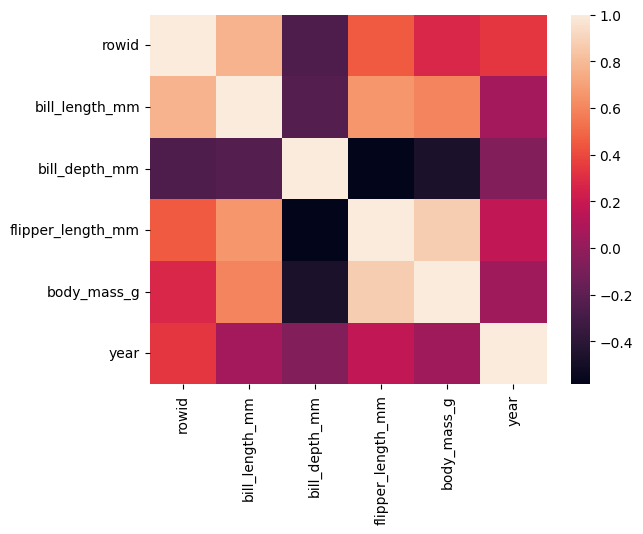

In [48]:
sns.heatmap(data.corr())

In [49]:
print(data.shape)

(342, 7)


In [52]:
print('Convolution')
data.cov()

Convolution


<ipython-input-52-03ea36ca928d>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.cov()


rowid  bill_length_mm  bill_depth_mm  \
rowid               9835.670319      414.774595     -50.835427   
bill_length_mm       414.774595       29.807054      -2.534234   
bill_depth_mm        -50.835427       -2.534234       3.899808   
flipper_length_mm    635.047950       50.375765     -16.212950   
body_mass_g        21911.008643     2605.591912    -747.370093   
year                  26.967690        0.243345      -0.097395   

                   flipper_length_mm    body_mass_g       year  
rowid                     635.047950   21911.008643  26.967690  
bill_length_mm             50.375765    2605.591912   0.243345  
bill_depth_mm             -16.212950    -747.370093  -0.097395  
flipper_length_mm         197.731792    9824.416062   1.949701  
body_mass_g              9824.416062  643131.077327  27.661162  
year                        1.949701      27.661162   0.667764

In [53]:
print('Correlation')
data.corr()

Correlation


<ipython-input-53-a0787c4814e9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


rowid  bill_length_mm  bill_depth_mm  flipper_length_mm  \
rowid              1.000000        0.766039      -0.259563           0.455372   
bill_length_mm     0.766039        1.000000      -0.235053           0.656181   
bill_depth_mm     -0.259563       -0.235053       1.000000          -0.583851   
flipper_length_mm  0.455372        0.656181      -0.583851           1.000000   
body_mass_g        0.275493        0.595110      -0.471916           0.871202   
year               0.332759        0.054545      -0.060354           0.169675   

                   body_mass_g      year  
rowid                 0.275493  0.332759  
bill_length_mm        0.595110  0.054545  
bill_depth_mm        -0.471916 -0.060354  
flipper_length_mm     0.871202  0.169675  
body_mass_g           1.000000  0.042209  
year                  0.042209  1.000000

In [54]:
data.isnull().sum()

rowid                0
species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
year                 0
dtype: int64

In [55]:
data['species'].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

<Axes: >

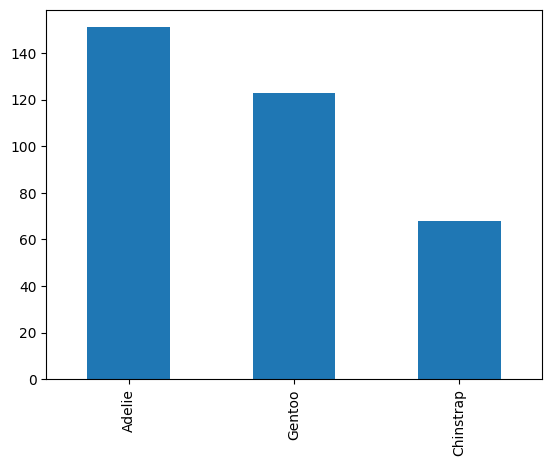

In [56]:
data['species'].value_counts().plot(kind='bar')

<Axes: >

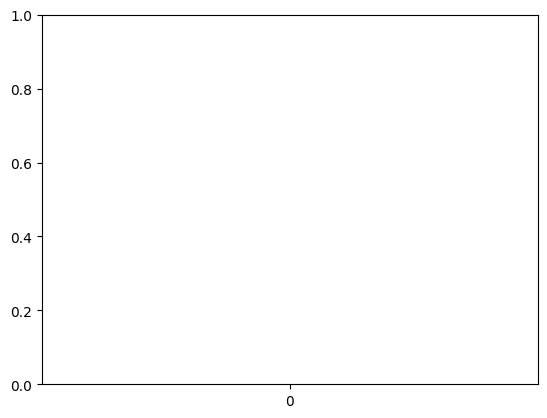

In [58]:
data1 = data[['bill_length_mm', 'bill_depth_mm','flipper_length_mm']]
sns.boxplot(dat=data1, width=0.5,fliersize=5)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


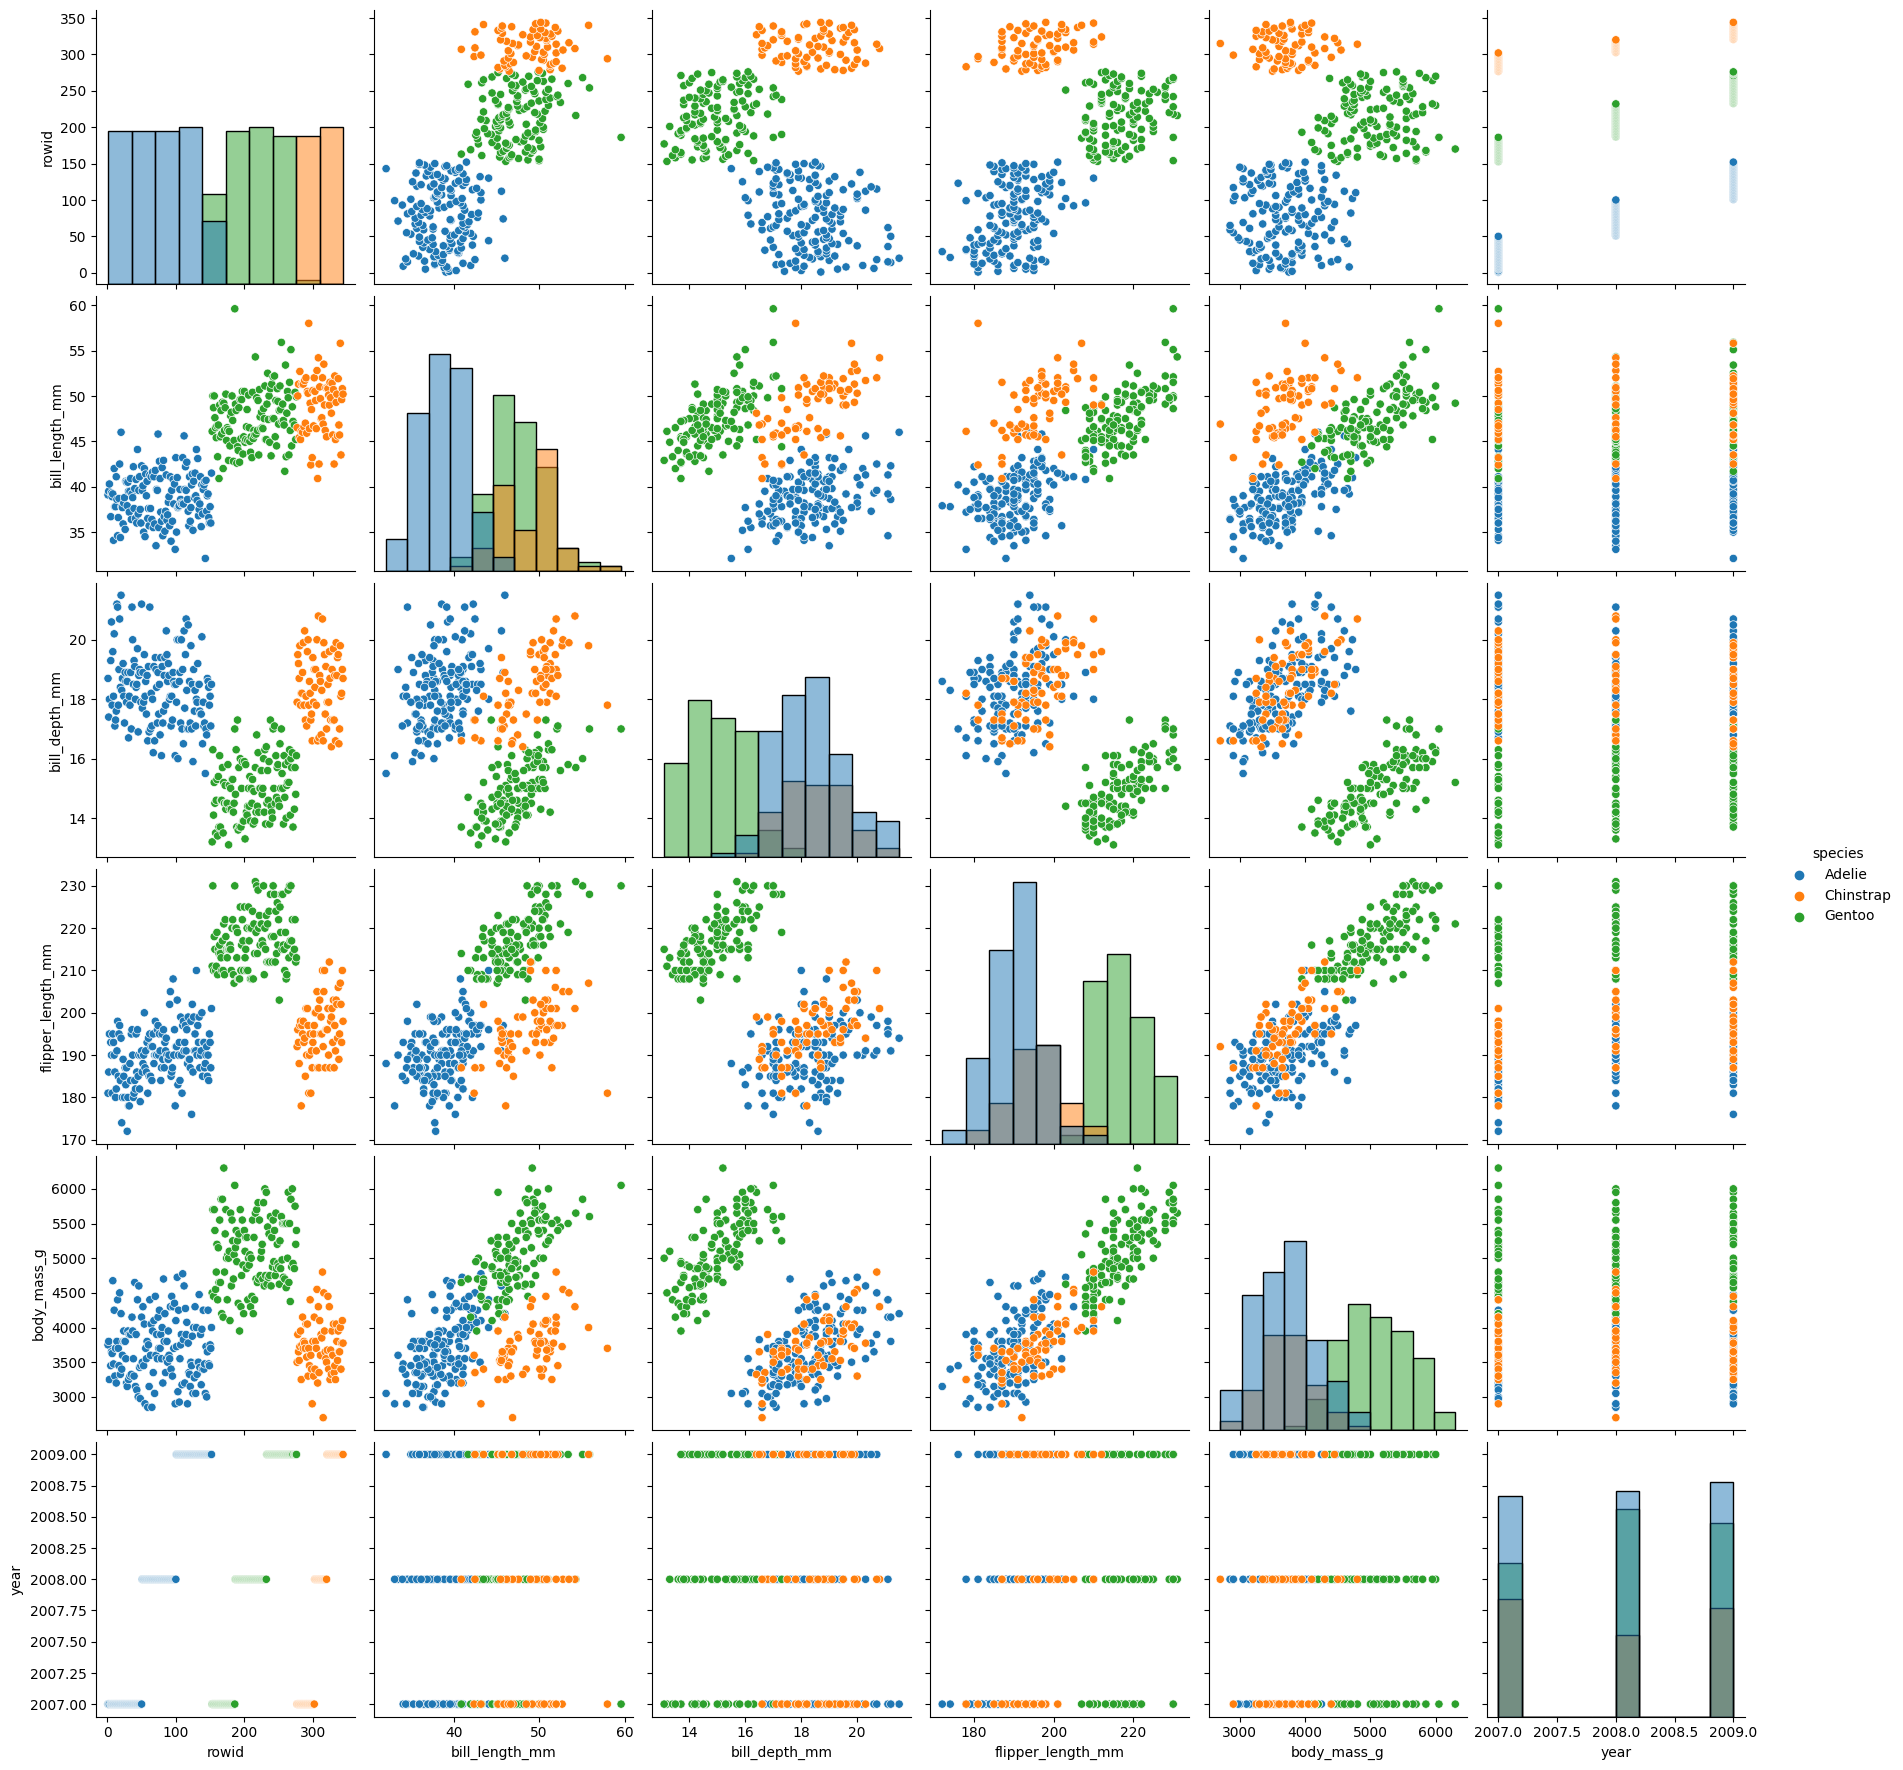

In [59]:
sns.pairplot(data, hue="species", size=3,diag_kind="hist")

In [60]:
data.columns

Index(['rowid', 'species', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'year'],
      dtype='object')

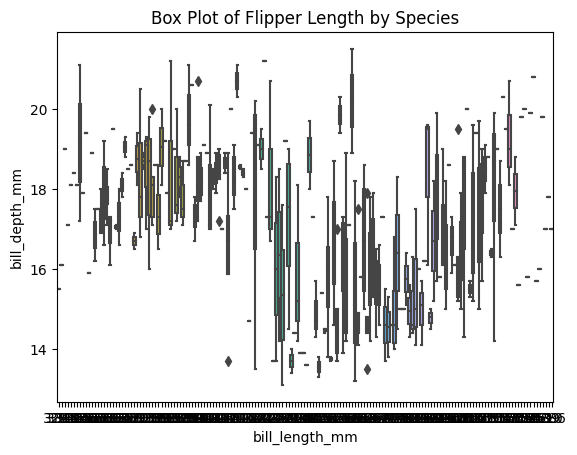

In [61]:

sns.boxplot(x="bill_length_mm", y="bill_depth_mm", data=data)
plt.xlabel("bill_length_mm")
plt.ylabel("bill_depth_mm")
plt.title("Box Plot of Flipper Length by Species")
plt.show()

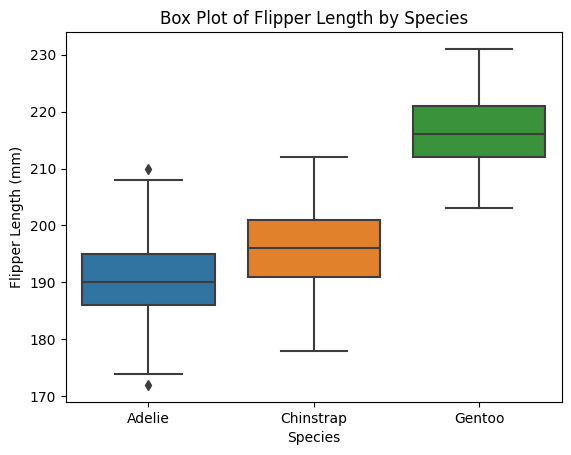

In [62]:

sns.boxplot(x="species", y="flipper_length_mm", data=data)
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")
plt.title("Box Plot of Flipper Length by Species")
plt.show()

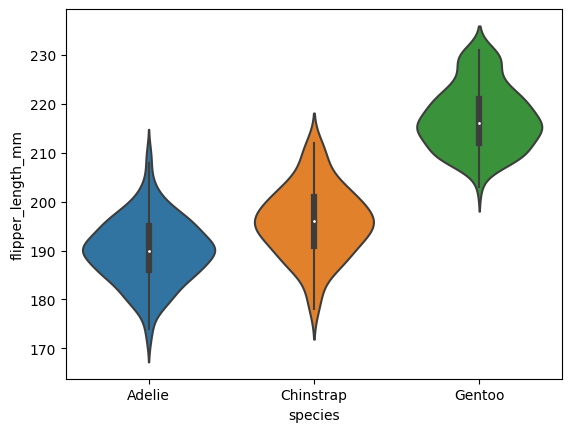

In [63]:
ax = sns.violinplot(x="species", y="flipper_length_mm", data=data, size=6)

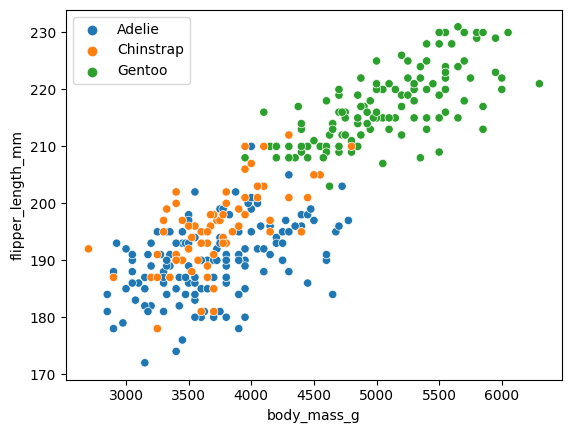

In [64]:
sns.scatterplot(data=data, x="body_mass_g", y="flipper_length_mm", hue="species")
plt.legend()
plt.show()

**4.HEART**

In [65]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
data = pd.read_csv("/content/heart.csv")

In [68]:
data.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [69]:
data.dtypes


age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

[Text(0, 0, 'No Heart disease'), Text(1, 0, 'Heart Disease')]

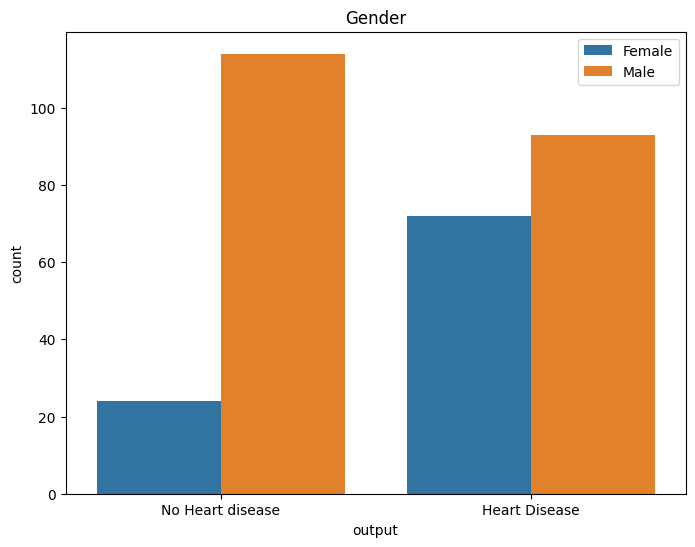

In [70]:
plt.figure(figsize =(8, 6))
f = sns.countplot(x = 'output', data = data, hue = 'sex')
plt.legend(['Female', 'Male'])
f.set_title("Gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])

In [71]:
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [72]:
X = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [76]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [77]:
model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1)

Epoch 1/50
8/8 [==============================] - 2s 4ms/step - loss: 0.6750 - accuracy: 0.5868
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6414 - accuracy: 0.6405
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6113 - accuracy: 0.7107
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5842 - accuracy: 0.7479
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5602 - accuracy: 0.7603
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5404 - accuracy: 0.7810
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5199 - accuracy: 0.7934
Epoch 8/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5023 - accuracy: 0.7975
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 0.4877 - accuracy: 0.7975
Epoch 10/50
8/8 [==============================] - 0s 5ms/step - loss: 0.4742 - accuracy: 0.8017
Epoch 11/50
8/8 [======================

In [78]:
accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

2/2 [==============================] - 0s 11ms/step - loss: 0.3918 - accuracy: 0.8197
Accuracy: [0.3917812705039978, 0.8196721076965332]


**penguins**

In [79]:
data=pd.read_csv("/content/penguins.csv")

In [80]:
data.head()

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [81]:
data.describe()

rowid  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      342.000000     342.000000         342.000000   
mean   172.500000       43.921930      17.151170         200.915205   
std     99.448479        5.459584       1.974793          14.061714   
min      1.000000       32.100000      13.100000         172.000000   
25%     86.750000       39.225000      15.600000         190.000000   
50%    172.500000       44.450000      17.300000         197.000000   
75%    258.250000       48.500000      18.700000         213.000000   
max    344.000000       59.600000      21.500000         231.000000   

       body_mass_g         year  
count   342.000000   344.000000  
mean   4201.754386  2008.029070  
std     801.954536     0.818356  
min    2700.000000  2007.000000  
25%    3550.000000  2007.000000  
50%    4050.000000  2008.000000  
75%    4750.000000  2009.000000  
max    6300.000000  2009.000000

In [82]:
data.dtypes

rowid                  int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [83]:
data.isnull()

rowid  species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    False    False   False           False          False              False   
1    False    False   False           False          False              False   
2    False    False   False           False          False              False   
3    False    False   False            True           True               True   
4    False    False   False           False          False              False   
..     ...      ...     ...             ...            ...                ...   
339  False    False   False           False          False              False   
340  False    False   False           False          False              False   
341  False    False   False           False          False              False   
342  False    False   False           False          False              False   
343  False    False   False           False          False              False   

     body_mass_g    sex   year  
0          False  False  False  
1          False  False  False  
2          False  False  False  
3           True   True  False  
4          False  False  False  
..           ...    ...    ...  
339        False  False  False  
340        False  False  False  
341        False  False  False  
342        False  False  False  
343        False  False  False  

[344 rows x 9 columns]

In [85]:
data.dropna()

rowid    species     island  bill_length_mm  bill_depth_mm  \
0        1     Adelie  Torgersen            39.1           18.7   
1        2     Adelie  Torgersen            39.5           17.4   
2        3     Adelie  Torgersen            40.3           18.0   
4        5     Adelie  Torgersen            36.7           19.3   
5        6     Adelie  Torgersen            39.3           20.6   
..     ...        ...        ...             ...            ...   
339    340  Chinstrap      Dream            55.8           19.8   
340    341  Chinstrap      Dream            43.5           18.1   
341    342  Chinstrap      Dream            49.6           18.2   
342    343  Chinstrap      Dream            50.8           19.0   
343    344  Chinstrap      Dream            50.2           18.7   

     flipper_length_mm  body_mass_g     sex  year  
0                181.0       3750.0    male  2007  
1                186.0       3800.0  female  2007  
2                195.0       3250.0  female  2007  
4                193.0       3450.0  female  2007  
5                190.0       3650.0    male  2007  
..                 ...          ...     ...   ...  
339              207.0       4000.0    male  2009  
340              202.0       3400.0  female  2009  
341              193.0       3775.0    male  2009  
342              210.0       4100.0    male  2009  
343              198.0       3775.0  female  2009  

[333 rows x 9 columns]

In [86]:
data['species'] = data['species'].astype('category')
data = data.drop(columns=['island','sex']).dropna()

features = data.drop(columns=['species'])
target = pd.get_dummies(data['species'])

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 0, shuffle = True, stratify=target)

In [88]:
inputs = keras.Input(shape=X_train.shape[1])
hidden_layer = keras.layers.Dense(10, activation="relu")(inputs)
output_layer = keras.layers.Dense(3, activation ="softmax")(hidden_layer)

In [89]:
model = keras.Model(inputs=inputs, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_8 (Dense)             (None, 10)                70        
                                                                 
 dense_9 (Dense)             (None, 3)                 33        
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy())

In [91]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 3ms/step - loss: 659.6743
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 499.6274
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 354.4784
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 267.1161
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 223.6166
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 177.0978
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 132.8927
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 94.9109
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 88.6437
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 87.8460
Epoch 11/100
9/9 [==============================] - 0s 3ms/step - loss: 82.6140
Epoch 12/100
9/9 [==============================] - 0s 3ms/step - loss: 80.9650
Epoch 13/100
9/9 [========================

<Axes: >

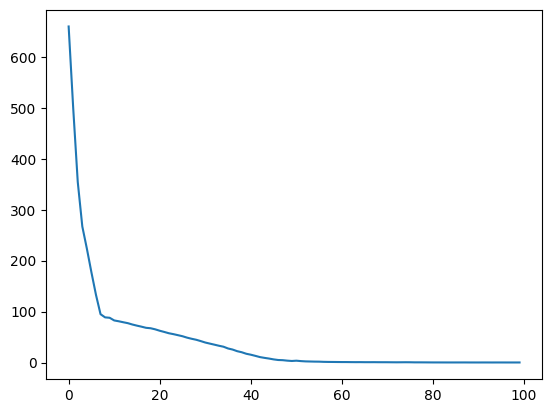

In [92]:
import seaborn as sns
sns.lineplot(x=history.epoch, y=history.history['loss'])

In [93]:
y_pred = model.predict(X_test)
pred = pd.DataFrame(y_pred, columns=target.columns)
pred

3/3 [==============================] - 0s 3ms/step


Adelie     Chinstrap        Gentoo
0   9.999999e-01  0.000000e+00  2.143878e-13
1   9.999999e-01  0.000000e+00  2.541289e-28
2   9.999999e-01  6.758688e-35  1.937016e-14
3   3.161448e-24  4.100745e-03  9.958993e-01
4   6.004329e-37  9.999999e-01  2.805953e-20
..           ...           ...           ...
64  1.000000e+00  0.000000e+00  0.000000e+00
65  1.000000e+00  0.000000e+00  5.746293e-36
66  4.046311e-12  1.000000e+00  4.596697e-21
67  6.507430e-36  2.147058e-09  1.000000e+00
68  0.000000e+00  8.205421e-27  1.000000e+00

[69 rows x 3 columns]

In [94]:
pred = pred.idxmax(axis="columns")
pred

0        Adelie
1        Adelie
2        Adelie
3        Gentoo
4     Chinstrap
        ...    
64       Adelie
65       Adelie
66    Chinstrap
67       Gentoo
68       Gentoo
Length: 69, dtype: object

In [95]:
from sklearn.metrics import confusion_matrix
species = y_test.idxmax(axis="columns")
matrix = confusion_matrix(species, pred)
print(matrix)

[[30  0  0]
 [ 0 14  0]
 [ 0  0 25]]
